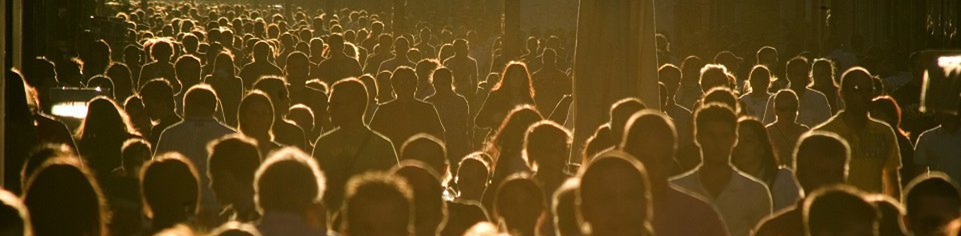
# IIND-4311 Estructuración de Redes Sociales 
## Fundamentos en estudio de redes sociales

## Modelos de Contagio
## Selección de Nodos Semilla

### Profesores: Felipe Montes

In [2]:
# Librerias que vamos a usar
import random
import operator
import pickle
import networkx as nx
import matplotlib.pyplot as plt

Importemos la red de Claudia Lopez para nuestra clase y actividad

In [3]:
# Importar el archivo pickle para utilizar la red
networokfile=open('./Red Facebook CL.pkl','rb')
G=pickle.load(networokfile)
networokfile.close()

In [4]:
# Cambiar a no dirigida
G=nx.to_undirected(G)

In [5]:
G.nodes[158190387560587]

{'Label': 'Claudia López',
 'username': 'ClaudiaLopezCL',
 'category': 'Public Figure',
 'post_activity': 0.58,
 'fan_count': 553278,
 'talking_about_count': 68339,
 'users_can_post': 'yes',
 'link': 'https://www.facebook.com/ClaudiaLopezCL/',
 'Costo $M': 0}

*Cada nodo posee un costo en millondes de pesos, el cual representa el costo de realizar una compaña publicitaria con el.*

Por último visualicemos la red

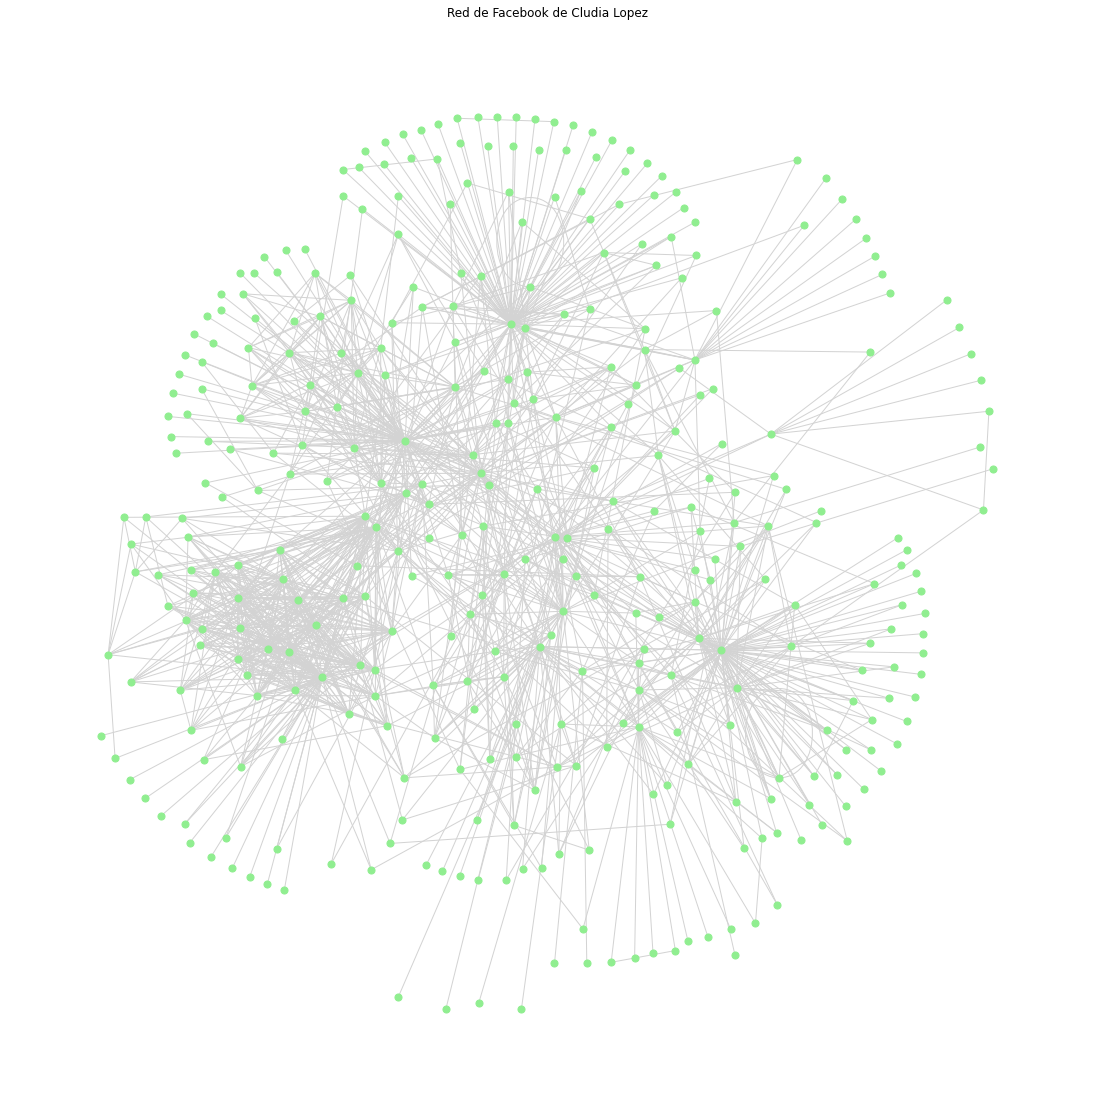

In [6]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de Facebook de Cludia Lopez')
# Por último se muestra la gráfica
plt.show()

#### Recuperemos las funciónes de contagio que construimos la clase pasada

Función de Inicialización de nodos bajo una serie de nodos semilla

In [ ]:
def Seed(G,initial):
    #Atributos Estado (0 si susceptible, 1 si infectado)
    for n in G.nodes():
        G.nodes[n]["Estado_t"]=0
        G.nodes[n]["Estado_t1"]=0
        
    #Infectar nodos semilla
    for n in initial:
        G.nodes[n]["Estado_t"]=1
        G.nodes[n]["Estado_t1"]=1

Función de Infección SI, pero nos interesa el tiempo que le toma a la infección contagiar $x\%$ de la red

In [ ]:
def SI(G, initial, p, perc_infected): 
    #1. Inicializar valores
    #Número de nodos
    nodes=float(G.number_of_nodes())

    #Inicializar el contagio en algunos nodos elegidos
    Seed(G,initial)

    #Inicializar la lista de infectados 
    infected=set(initial)
    #Inicializar lista para el % de nodos infectados
    numInfectedList=list()
    numInfectedList.append(float(len(initial)/nodes))
    
    #Inicializar la lista de susceptibles
    susceptible=set([n for n in G.nodes() if n not in initial])
    #Inicializar lista para el % de nodos susceptibles
    numSusceptibleList=list()
    numSusceptibleList.append(float(len(susceptible)/nodes))

    #Inicializar tiempo
    t=0

    #2. Dinámica de contagio
    #Definir condición de parada (en este caso: hasta que se infecte la red en perc_infected)
    while float(len(infected)/nodes) <= perc_infected:
        #Actualizar para cada nodo el estado de t a t+1
        for node in G.nodes():
            G.nodes[node]["Estado_t"]=G.nodes[node]["Estado_t1"]
            
        #Contagio 
        for node in G.nodes(): 
            if G.nodes[node]["Estado_t"]==1:
                vecino=random.choice(list(G.neighbors(node)))
                if G.nodes[vecino]["Estado_t"]==0: 
                    if random.random()<=p:
                        G.nodes[vecino]["Estado_t1"]=1                                                     
                        infected.add(vecino)          
                            
        susceptible=set([n for n in G.nodes() if n not in infected])
        
        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        numInfectedList.append(float(len(infected)/nodes)*100)
        numSusceptibleList.append(float(len(susceptible)/nodes)*100)
        
        #Actualizar tiempo
        t=t+1
        
    #Devolver diccionario con lista de % de infectados y susceptibles
    porcentaje_t=dict()
    porcentaje_t["susceptible"]=numSusceptibleList
    porcentaje_t["infected"]=numInfectedList
    
    return(porcentaje_t , t)

Función de calculo de costos

In [ ]:
def Cost(nodos):
    costo=0
    for i in nodos:
        costo+=G.nodes[i]["Costo $M"]
        
    return costo

### Métodos de Selección de Nodos Semilla

###### Nodos con mayor Grado

In [ ]:
def Deg(G, n):
    #Lista de grados de cada nodo
    degree = nx.degree_centrality(G)
    #Orden descendente de los grados
    sorted_deg = sorted(degree.items(), key = operator.itemgetter(1), reverse=True)
    
    #Selección de n nodos
    highestdegree = []
    for i in range(n):
        highestdegree.append(sorted_deg[i][0])
        
    #Salida
    return(highestdegree)

###### Nodos con mayor Betweenness

In [ ]:
def Betw(G, n):
    #Lista de grados de cada nodo
    betweenness = nx.betweenness_centrality(G)
    #Orden descendente de los grados
    sorted_bet=sorted(betweenness.items(), key=operator.itemgetter(1),reverse=True)
    
    #Selección de n nodos
    highestbetweenness = []
    for i in range(n):
        highestbetweenness.append(sorted_bet[i][0])
        
    #Salida
    return(highestbetweenness)

**Contagio con modelo SI con la estrategia de nodos de mayor grado**

In [ ]:
#Parámetros
tasa_infeccion=0.01
porcentaje_infectar=0.8
num_semillas=10

#Corrida
semillas=Deg(G,num_semillas)
costo_t=Cost(semillas)
infeccion1=SI(G,semillas,tasa_infeccion,porcentaje_infectar)

#Resultados
print(f"Estrategia mayor grado: Para infectar el{porcentaje_infectar*100: .0f}% de la red con {num_semillas:.0f} semillas,"
      f" si la tasa de contagio de del {tasa_infeccion*100: .1f}%, se requiere de {infeccion1[1]:d} momentos y un costo de{costo_t: .3f} millones de pesos")

**Contagio con modelo SI con la estrategia de nodos de mayor betweenness**

In [ ]:
#Parámetros
tasa_infeccion=0.01
porcentaje_infectar=0.8
num_semillas=10

#Corrida
semillas=Betw(G,num_semillas)
costo_t=Cost(semillas)
infeccion2=SI(G,semillas,tasa_infeccion,porcentaje_infectar)

#Resultados
print(f"Estrategia mayor grado: Para infectar el{porcentaje_infectar*100: .0f}% de la red con {num_semillas:.0f} semillas,"
      f" si la tasa de contagio de del {tasa_infeccion*100: .1f}%, se requiere de {infeccion2[1]:d} momentos y un costo de{costo_t: .3f} millones de pesos")

#### Grafica de los dos métodos

In [ ]:
#Graficar
plt.plot(infeccion1[0]["infected"],c="red",label="Infectados Degree")
plt.plot(infeccion2[0]["infected"],c="orange",label="Infectados Betweennes")
plt.xlabel("t")
plt.ylabel("% infectados")
plt.legend()
plt.title("Evolución del contagio en la red social",fontsize=14)
plt.show()

## Actividad
Para la actividad ustedes deben construir las funciones para la selección de nodos semilla basándose en la estrategia de nodos  con mayor *Eigenvector Centrality*. Adicionalmente deberán construir un método de selección de nodos basados en *Community Hubs*, los cuales van a ser aquellos nodos más conectados en sus respectivas comunidades.

###### Nodos con mayor Eigenvector Centrality

In [ ]:
def EigCen(G, n):
    #Lista de Eigenvector Centrality de cada nodo
    
    #Orden descendente
    
    
    #Selección de n nodos
    
        
    #Salida
    return()

###### Comunity Hubs

Primero hay que detectar las comunidades

In [ ]:
## Librerias para la detección de comunidades por Louvain
#!pip install python-louvain
import community

**Ayuda**: Función para la detección de comunidades mediante el metodo de Louvain. Esta función regresa los subgrafos de cada comunidad.

In [ ]:
def Communites_graph(G):
    #Convertimos el grado en no dirigido
    G2 = G.to_undirected()
    
    #Detección de comunidades
    partition = community.best_partition(G2)
    
    #Creación de Sub-grafos para cada comunidad
    Communities = dict()
    for i in range(len(set(partition.values()))):
        community_nodes = [k for k,v in partition.items() if v == i]
        Communities[i+1] = G2.subgraph(community_nodes)
        
    #Salida
    return Communities

Función para la detección de hubs dentro de cada comunidad a partir del grado

In [ ]:
def Comhub(G, n):
    # Identificamos las comunidades con la función ya construida
    Communities = Communites_graph(G)
    
    # Guadamos en un diccionario el número de individuos en cada comunidad
    len_communities = dict()
    for i in range(len(Communities)):
        len_communities[i+1]= int(len(Communities[i+1]))
    
    #Ordenamos por tamaño las comunidades
    sorted_len = sorted(len_communities.items(), key = operator.itemgetter(1), reverse=True)
    
    #Seleccionamos los nodos de cada comunidad con mayor grado dentro de la comunidad
    Community_hubs = []
    
    ## Continúen aquí
    
        
    return(Community_hubs)

La campaña de Claudia López ya ha invertido mucho dinero durante su candidatura, por lo que el jefe de campaña solo les ha dado **10 millones de pesos** para realizar una prueba piloto sobre la efectividad de una campaña por Facebook basada en estudio de redes que ustedes han propuesto.

Por lo tanto, deben escoger entre una de las metodologías de selección de nodos semilla (nodos con mayor *Degree Centrality*, nodos con *mayor Betweenness*, nodos con mayor *Eigenvector Centrality* y los *Community Hubs*) teniendo presente que *no pueden exceder el presupuesto* al escoger los nodos y quieren que la propagación de información ocurra en el menor tiempo posible dado que las elecciones se aproximan. Si lo desean pueden utilizar estrategias mixtas, es decir nodos identificados con diferentes estrategias.

Adicionalmente, ustedes quieren que su publicidad llegue a mínimo el 80% de la población para poder considerar la prueba piloto como un éxito.

Comparen las estrategias y den su recomendación de a que nodos la campaña de Claudia Lopez debería contratar para hacer publicidad. Muestren clara y ordenadamente su procedimiento.

*Nota*: Simulen el contagio con un modelo SI, con una tasa de adopción de 0.1%